In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop('RowNumber',axis='columns',inplace=True)

In [6]:
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)



In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


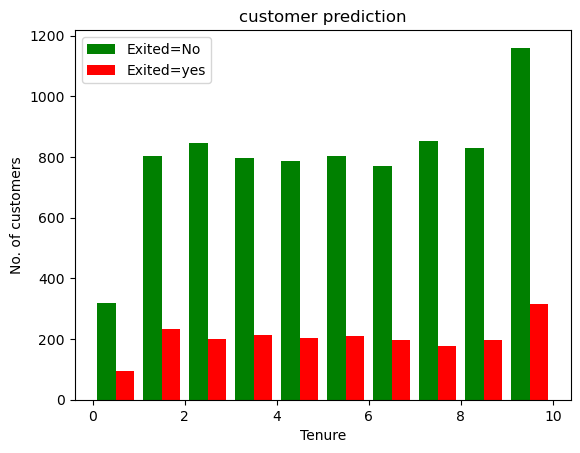

In [8]:
Ext_No = df[df.Exited == 0].Tenure
Ext_yes = df[df.Exited == 1].Tenure


plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title('customer prediction')

plt.hist([Ext_No,Ext_yes],color=['green','red'],label=['Exited=No','Exited=yes'])
plt.legend()

In [9]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [10]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7722,684,Germany,0,18,9,90544.00,1,0,1,4777.23,0
8096,671,France,1,38,6,132129.72,1,0,1,76068.95,0


In [11]:
#dependent Variable X
#independent variable Y

X=df.iloc[:,:-1]

In [12]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64
9996,516,France,0,35,10,57369.61,1,1,1,101699.77
9997,709,France,1,36,7,0.00,1,0,1,42085.58
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52


In [13]:
Y = df.iloc[:,-1]

In [14]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
one_hot=pd.get_dummies(df['Geography'])

In [16]:
one_hot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [17]:
df = df.drop('Geography',axis=1)

In [18]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2882,551,0,37,3,0.00,2,1,1,50578.40,0
9415,768,1,43,2,129264.05,2,0,0,19150.14,0
8478,639,0,66,0,0.00,2,0,1,42240.54,0
2442,680,1,34,1,0.00,2,1,0,167035.07,0
2450,589,1,46,10,107238.85,2,1,0,37024.28,0


In [19]:
df = df.join(one_hot)

In [20]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
7330,418,0,34,8,155973.88,1,1,0,154208.96,0,True,False,False
5063,614,1,41,7,146997.64,2,0,0,137791.18,0,False,False,True
6101,833,0,32,6,0.00,1,1,1,44323.22,1,False,False,True
5196,719,1,22,7,114415.84,1,1,1,177497.40,0,True,False,False
5542,682,1,35,2,181166.44,1,1,1,63737.19,1,True,False,False


In [21]:
df['France'].replace({'True':1,'False':0},inplace=True)
df['Germany'].replace({'True':1,'False':0},inplace=True)
df['Spain'].replace({'True':1,'False':0},inplace=True)

In [22]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
5171,537,0,39,2,0.00,2,1,1,137651.60,0,True,False,False
782,517,0,41,2,0.00,2,0,1,75937.47,0,True,False,False
3558,765,0,41,4,124182.21,1,0,0,100153.43,0,True,False,False
8103,479,0,51,1,107714.74,3,1,0,86128.21,1,False,True,False
3710,645,0,30,1,125739.26,1,1,1,193441.23,0,True,False,False


In [23]:
df = df.drop('France',axis=1)

In [24]:
df = df.drop('Germany',axis=1)

In [25]:
df = df.drop('Spain',axis=1)

In [26]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5537,527,1,41,10,136733.24,1,1,1,57589.29,0
1262,665,1,40,1,173432.55,1,0,1,116766.79,0
6248,590,0,47,3,0.00,2,1,0,171774.50,0
1230,775,0,36,2,109949.05,2,0,1,71682.54,0
4372,628,0,31,0,88421.81,1,0,0,72350.47,0


In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X=df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size =0.2, random_state=5)

In [29]:
X_Train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,750,1,39,6,0.00,2,0,0,19264.33
4154,726,0,34,3,0.00,2,1,0,196288.46
3881,588,1,64,3,0.00,1,1,1,189703.65
9238,773,1,50,4,0.00,2,1,0,129372.94
5210,551,0,35,7,129717.30,2,0,0,86937.20
...,...,...,...,...,...,...,...,...,...
3046,658,1,31,3,133003.03,1,0,1,146339.27
9917,635,0,53,8,117005.55,1,0,1,123646.57
4079,583,1,31,4,158978.79,1,1,0,12538.92
2254,679,0,36,6,147733.64,1,0,1,172501.38


In [30]:
X_Train.shape

(8000, 9)

In [31]:
Y_Train.shape

(8000,)

In [32]:
X_Test.shape

(2000, 9)

In [33]:
Y_Test.shape

(2000,)

In [34]:
#Neural network
import tensorflow as tf
from tensorflow import keras

In [35]:
model= keras.Sequential([
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_Train,Y_Train, epochs=100)



Epoch 1/100


250/250 [==============================] - 2s 2ms/step - loss: 1159.0114 - accuracy: 0.6761
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 86.2349 - accuracy: 0.6927
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 77.1000 - accuracy: 0.6864
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 75.1006 - accuracy: 0.6841
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 106.1397 - accuracy: 0.6810
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 100.5652 - accuracy: 0.6844
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 81.4351 - accuracy: 0.6871
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 82.8179 - accuracy: 0.6933
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 64.7913 - accuracy: 0.6881
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss

250/250 [==============================] - 0s 2ms/step - loss: 44.5003 - accuracy: 0.6820
Epoch 73/100
250/250 [==============================] - 0s 2ms/step - loss: 48.0835 - accuracy: 0.6914
Epoch 74/100
250/250 [==============================] - 0s 2ms/step - loss: 39.2405 - accuracy: 0.6835
Epoch 75/100
250/250 [==============================] - 0s 2ms/step - loss: 37.5692 - accuracy: 0.6889
Epoch 76/100
250/250 [==============================] - 0s 2ms/step - loss: 35.0691 - accuracy: 0.6883
Epoch 77/100
250/250 [==============================] - 0s 2ms/step - loss: 33.5616 - accuracy: 0.6875
Epoch 78/100
250/250 [==============================] - 0s 1ms/step - loss: 39.6337 - accuracy: 0.6884
Epoch 79/100
250/250 [==============================] - 0s 1ms/step - loss: 37.0748 - accuracy: 0.6895
Epoch 80/100
250/250 [==============================] - 0s 1ms/step - loss: 46.1946 - accuracy: 0.6876
Epoch 81/100
250/250 [==============================] - 0s 2ms/step - loss: 35.5393 - 